<a href="https://colab.research.google.com/github/piercepatrick/Data-Science-Masters-Program-Tuition/blob/master/Data_Cleaning_%26_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning and Feature Engineering**

In this notebook the following was completed:


*   Filtered the DataFrame for program names that included keywords related to Data Science.

*   Dropped columns 'role', 'apply_date', 'world_ranking', 'gpa', 'gmat', 'start_date', &'gre'. 

*   Stripped all textual columns of preceding and succeeding brackets and quotation marks.

*   Replaced column values that were empty with Nan.

*   Visualized missing values in the DataFrame.

*   Cleaned the description column using texthero.

*   Created columns 'gre_yn','tuition_per_month', 'desc_len', 'toefl_yn','ielts_yn', 'summer_start_yn','spring_start_yn', 'fall_start_yn', 'gmat_yn','university_tier_ranking', 'gpa_yn'.









In [1]:
! pip install texthero --quiet

In [2]:
! pip install sidetable --quiet

In [3]:
# Import packages
import texthero as hero
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sidetable
import sys
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
# Read in Dirty Data
df = pd.read_csv('/content/drive/My Drive/DS/Data Masters Programs/DS_Masters_Programs_Data.csv')
df.head()

,Unnamed: 0,university_name,program_name,tags,duration,tuition,apply_date,start_date,description,state,city,world_ranking,role,disciplines,delivered,Unnamed: 0.1,university_name.1,program_name.1,tags.1,duration.1,tuition.1,apply_date.1,start_date.1,description.1,state.1,city.1,world_ranking.1,role.1,disciplines.1,delivered.1,gpa,gre,gmat,toefl,ielts,credits
0,0,['University of Rochester'],['Data Science'],[' M.Sc. '],12.0,1784.0,1/5/2021,8/25/2021,['The Goergen Institute for Data Science offer...,['New York'],['Rochester'],125.0,Full-time,Data Science & Big Data,[' On Campus '],0,['University of Rochester'],['Data Science'],[' M.Sc. '],12.0,1784.0,1/5/2021,8/25/2021,['The Goergen Institute for Data Science offer...,['New York'],['Rochester'],125.0,Full-time,Data Science & Big Data,[' On Campus '],NaN,Required,NaN,105.0,7.0,30 alternative credits
1,1,['Bellevue University'],['Data Science'],[' M.Sc. '],24.0,585.0,1/8/2021,3/9/2021,['The Data Science program at Bellevue Univers...,['Nebraska'],['Bellevue'],NaN,Full-time,Data Science & Big Data,[' Online '],1,['Bellevue University'],['Data Science'],[' M.Sc. '],24.0,585.0,1/8/2021,3/9/2021,['The Data Science program at Bellevue Univers...,['Nebraska'],['Bellevue'],NaN,Full-time,Data Science & Big Data,[' Online '],3,NaN,NaN,71.0,NaN,30 alternative credits
2,2,['New York University'],['Data Science'],[' M.Sc. '],24.0,22272.0,1/22/2021,9/2/2021,['The Master of Science in Data Science from\x...,['New York'],['New York City'],28.0,Full-time,Data Science & Big Data,[' On Campus '],2,['New York University'],['Data Science'],[' M.Sc. '],24.0,22272.0,1/22/2021,9/2/2021,['The Master of Science in Data Science from\x...,['New York'],['New York City'],28.0,Full-time,Data Science & Big Data,[' On Campus '],NaN,Required,NaN,105.0,7.0,36 alternative credits
3,3,['Lipscomb University'],['Data Science'],[' Master '],12.0,1288.0,NaN,8/19/2020,['The Data Science program offered by the Lips...,['Florida'],['Memphis'],NaN,Full-time,Informatics & Information Sciences,[' On Campus '],3,['Lipscomb University'],['Data Science'],[' Master '],12.0,1288.0,NaN,8/19/2020,['The Data Science program offered by the Lips...,['Florida'],['Memphis'],NaN,Full-time,Informatics & Information Sciences,[' On Campus '],NaN,NaN,NaN,71.0,NaN,30 alternative credits
4,4,['University of Massachusetts Dartmouth'],['Data Science'],[' M.Sc. '],12.0,22183.0,12/15/2020,4/15/2021,['The Data Science program of University of Ma...,['New York'],['New York City'],191.0,Full-time,Data Science & Big Data,[' On Campus '],4,['University of Massachusetts Dartmouth'],['Data Science'],[' M.Sc. '],12.0,22183.0,12/15/2020,4/15/2021,['The Data Science program of University of Ma...,['New York'],['New York City'],191.0,Full-time,Data Science & Big Data,[' On Campus '],3,Required,NaN,100.0,7.5,30 alternative credits


In [5]:
# Dropping columns that got accidently duplicated
df.drop(['Unnamed: 0', 'university_name.1', 'program_name.1', 'tags.1', 'duration.1', 'tuition.1', 'apply_date.1', 'start_date.1', 'description.1', 'state.1',
       'city.1', 'world_ranking.1', 'role.1', 'disciplines.1', 'delivered.1'], axis=1, inplace=True)

In [6]:
# Cleaning textual data
df['university_name'] = df['university_name'].map(lambda x: x.lstrip("['").rstrip("']"))
df['program_name'] = df['program_name'].map(lambda x: x.lstrip("['").rstrip("']"))
df['tags'] = df['tags'].map(lambda x: x.lstrip("['").rstrip("']"))
df['description'] = df['description'].map(lambda x: x.lstrip("['").rstrip("']"))
df['state'] = df['state'].map(lambda x: x.lstrip("['").rstrip("']"))
df['city'] = df['city'].map(lambda x: x.lstrip("['").rstrip("']"))
df['delivered'] = df['delivered'].str.rstrip("[]'")
df['delivered'] = df['delivered'].str.lstrip("[]'")

In [7]:
# Wrong state was named on 4th listing
df.at[3, 'state'] = 'Tennessee'
# Fixing gpa value 
df.at[414, 'gpa'] = 3

In [8]:
searchfor = ['Data', 'Analytics', 'Statistics', 'Computer', 'Business', 'Biostatistics', 'Information Systems', 'Artificial', 'Information Technology', 'Mathematics','Economics']
s = df['program_name']
df = df[s.str.contains('|'.join(searchfor))]

In [9]:
# Erasing alternative credits from credits column 
df['credits'] = df['credits'].astype(str).str.replace('\D', '')
# Filling empty credits rows with nan
df.loc[df['credits'] == '', 'credits'] = np.nan
# Replacing tags values
df['tags'] = df['tags'].astype(str).str.replace(' Postgraduate Diploma ', ' Master ')
# Cleaning the delivered column
df['delivered'] = df['delivered'].astype(str).str.replace('  On Campus,  Online  ', 'Blended')
df['delivered'] = df['delivered'].astype(str).str.replace('  Blended ', 'Blended')
df['delivered'] = df['delivered'].astype(str).str.replace('  On Campus,  Blended,  Online  ', 'Blended')
df['delivered'] = df['delivered'].astype(str).str.replace('  Blended,  Online  ', 'Blended')
df['delivered'] = df['delivered'].astype(str).str.replace('  On Campus,Blended', 'Blended')
df['delivered'] = df['delivered'].astype(str).str.replace('  Online  ', 'Online')
df['delivered'] = df['delivered'].astype(str).str.replace('  On Campus ', 'On Campus')
# Cleaning gre column
df['gre'] = df['gre'].astype(str).str.replace('nan', 'Not Required')
df['gre'] = df['gre'].astype(str).str.replace(' Required ', 'Required')
# Cleaning gmat column
df['gmat'] = df['gmat'].astype(str).str.replace('nan', 'Not Required')
df['gmat'] = df['gmat'].astype(str).str.replace(' Required ', 'Required')

In [10]:
# Finding which gre rows are blank
fill_gre = df.loc[df['gre'] == ' ']
print(fill_gre)

                                   university_name  ... credits
56                          University of Delaware  ...      33
64                Illinois Institute of Technology  ...     NaN
95                              Chapman University  ...      30
177                       Florida State University  ...     NaN
215                     University of Pennsylvania  ...      32
263                      Kennesaw State University  ...      30
564                                Duke University  ...      36
577  Missouri University of Science and Technology  ...      30
594                                Duke University  ...      30
641                     San Diego State University  ...      36

[10 rows x 21 columns]


In [11]:
# Replacing those rows with Not Required
rows = [56, 64, 95 ,177, 215, 263, 564, 577, 594, 641]
for row in rows:
  df.at[row, 'gre'] = 'Not Required'

In [12]:
# Finding which gmat rows are blank
fill_gmat = df.loc[df['gmat'] == ' ']
print(fill_gmat)

                           university_name  ... credits
52         Worcester Polytechnic Institute  ...      32
56                  University of Delaware  ...      33
184  California State University Fullerton  ...      30
185                 University of Oklahoma  ...      32
207            Georgia Southern University  ...      43
225                   Rockhurst University  ...      36
368                   Fairfield University  ...      36
385             University of Nevada, Reno  ...      46

[8 rows x 21 columns]


In [13]:
# Repalcing those rows with Not Required
rows = [52,56,184,185,207,225,368,385]
for row in rows:
  df.at[row, 'gmat'] = 'Not Required'

In [14]:
# Seeing unique values in credits column
df.credits.unique()

array(['30', '36', '10', nan, '52', '38', '32', '60', '28', '33', '45',
       '35', '31', '34', '39', '12', '108', '50', '40', '128', '46', '43',
       '27', '120', '48', '58', '72', '42', '90', '3032', '3036'],
      dtype=object)

In [15]:
# Investigating the two outliers
inv_credits = df.loc[(df['credits'] == '3036') | (df['credits'] == '3032')]
print(inv_credits)

                         university_name  ... credits
589  Southeast Missouri State University  ...    3032
626         George Washington University  ...    3036

[2 rows x 21 columns]


In [16]:
# Replacing the two outliers
df.at[589, 'credits'] = np.nan
df.at[626, 'credits'] = np.nan

In [17]:
# Cleaning the description column
df['description'] = df['description'].pipe(hero.clean)
# Checking to see if it worked
df.description.unique()

array(['goergen institute data science offers stem accredited data science program university rochester well advanced certificate data science',
       'data science program bellevue university designed prepare driver seat curate analyze make relevant discoveries large data sets xa0',
       'master science data science xa0new york university highly selective program students strong background mathematics computer science applied statistics degree focuses development new methods data science',
       'data science program offered lipscomb universityxa0deals big data find insights new emerging types data content sought professional',
       'data science program university massachusetts dartmouth prepares leadership positions data analytics information management knowledge engineering jointly offered departments computer science engineering mathematics arts sciences',
       'data everywhere e commerce sales app downloads smartphone supply chain management bioinformatics connected devic

In [18]:
# It cleaned everything excpet the 'xa0' value in some of the words

# This will do that for us
df = df.replace(to_replace= r'xa0', value= '', regex=True)

In [19]:
# Visualizing null values
df.stb.missing(style = True) 

,missing,total,percent
gpa,206,414,49.76%
apply_date,187,414,45.17%
world_ranking,114,414,27.54%
credits,107,414,25.85%
start_date,72,414,17.39%
role,54,414,13.04%
ielts,47,414,11.35%
toefl,43,414,10.39%
duration,32,414,7.73%
tuition,1,414,0.24%


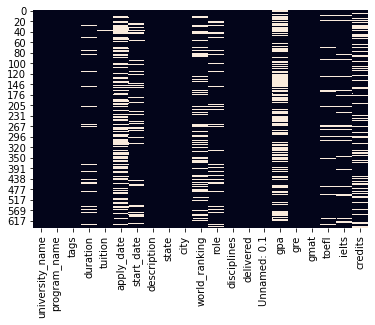

In [20]:
# Heatmap of nulls
sns.heatmap(df.isnull(), cbar=False)

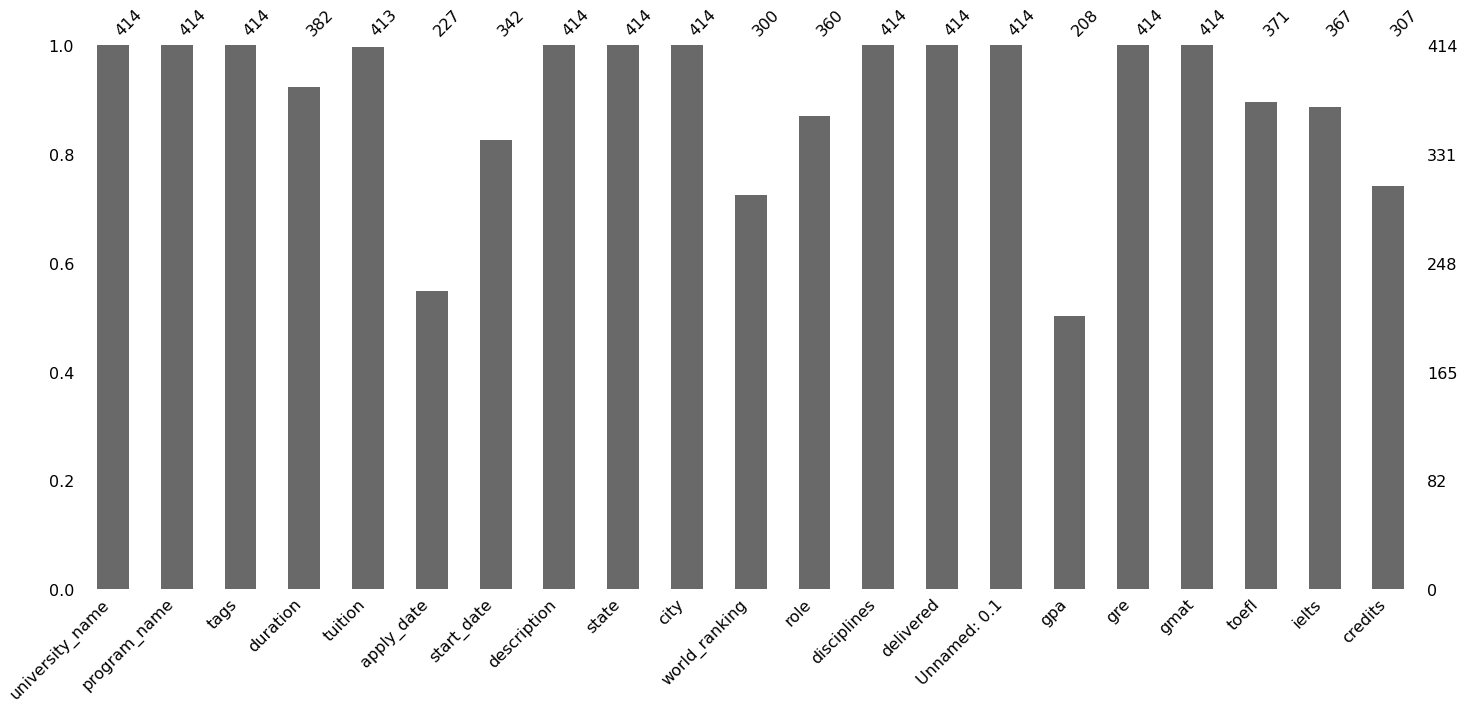

In [21]:
# Bargraph of nulls
msno.bar(df)

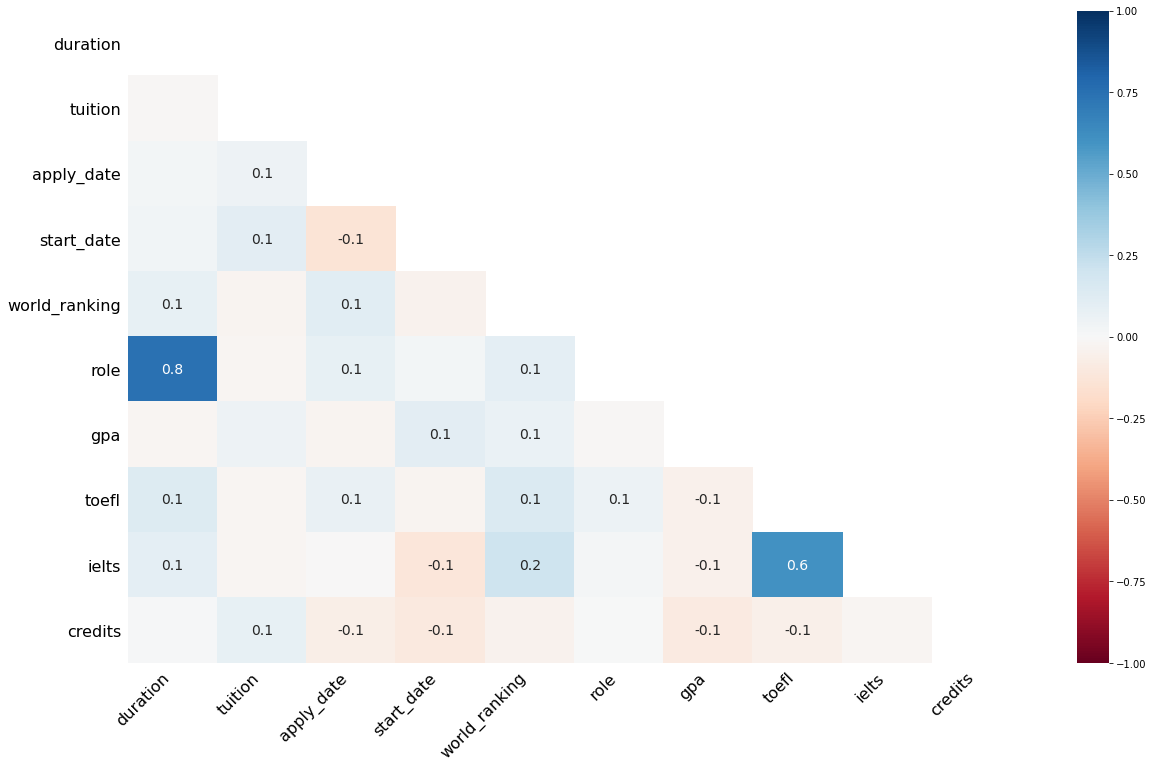

In [22]:
# Displays a correlation of missingness 
msno.heatmap(df)
# If role is missing, duration is likely to be missing
# if one english test requirement is missing, the other is likely to be missing as well

In [23]:
# Checking unique values in gpa
df.gpa.unique()

array([nan, '3', '2.75', '2.5', '2.7', '3.2', '3.4', '3.25', '3.3', '3.5',
       '2', '3.01', 3, '3.1', '2.85'], dtype=object)

In [24]:
# Making new column called gpa_yn, 1 if gpa is required 0 if not
numbers = ['3', '2.75', '2.5', '2.7','3.2','3.4','3.25','3.3','3.5','2','3.01','3','3.1','2.85']
def value(x):
  x = str(x)
  if x in numbers:    
    return 1
  else:
    return 0
df["gpa_yn"] = df["gpa"].apply(value)

In [25]:
# investigating world_ranking column
df.world_ranking.describe()

count     300.000000
mean      288.150000
std       309.774447
min         1.000000
25%        47.000000
50%       191.000000
75%       450.000000
max      1221.000000
Name: world_ranking, dtype: float64

In [26]:
# making a new column that ranks the university rankings into tiers
# the world_ranking column had unranked universities as nan so this places those values
# in the worst tier
def value(x):
  if (pd.isnull(x)):
    return 5
  elif x >= 1 and x <= 47:
    return 1
  elif x >47 and x <= 191:
    return 2
  elif x >191 and x <= 450:
    return 3
  elif x >450 and x <= 1221:
    return 4
df["university_tier_ranking"] = df["world_ranking"].apply(value)

In [27]:
# Getting rid of the one row with tuition as null
df = df[df['tuition'].notnull()]

In [28]:
# Descriptive statistics for all columns
df.describe(include='all')

,university_name,program_name,tags,duration,tuition,apply_date,start_date,description,state,city,world_ranking,role,disciplines,delivered,Unnamed: 0.1,gpa,gre,gmat,toefl,ielts,credits,gpa_yn,university_tier_ranking
count,413,413,413,381.000000,413.000000,227,342,413,413,413,299.000000,359,413,413,413.000000,208,413,413,370.000000,366.000000,307,413.000000,413.000000
unique,229,145,6,NaN,NaN,55,82,375,48,174,NaN,1,37,4,NaN,14,2,2,NaN,NaN,28,NaN,NaN
top,University of Southern California,Computer Science,M.Sc.,NaN,NaN,8/1/2020,8/26/2020,data everywhere e commerce sales app downloads...,California,New York City,NaN,Full-time,Computer Sciences,On Campus,NaN,3,Not Required,Not Required,NaN,NaN,30,NaN,NaN
freq,9,91,348,NaN,NaN,26,26,5,47,27,NaN,359,115,251,NaN,165,274,364,NaN,NaN,164,NaN,NaN
mean,NaN,NaN,NaN,18.170604,17284.508475,NaN,NaN,NaN,NaN,NaN,288.615385,NaN,NaN,NaN,267.745763,NaN,NaN,NaN,85.081081,6.613388,NaN,0.503632,3.181598
std,NaN,NaN,NaN,8.477200,18075.487885,NaN,NaN,NaN,NaN,NaN,310.188700,NaN,NaN,NaN,184.476327,NaN,NaN,NaN,9.449275,0.388338,NaN,0.500593,1.475841
min,NaN,NaN,NaN,3.000000,319.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,61.000000,5.500000,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,12.000000,1235.000000,NaN,NaN,NaN,NaN,NaN,47.000000,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,79.000000,6.500000,NaN,0.000000,2.000000
50%,NaN,NaN,NaN,12.000000,11442.000000,NaN,NaN,NaN,NaN,NaN,191.000000,NaN,NaN,NaN,241.000000,NaN,NaN,NaN,80.000000,6.500000,NaN,1.000000,3.000000
75%,NaN,NaN,NaN,24.000000,27204.000000,NaN,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,414.000000,NaN,NaN,NaN,90.000000,7.000000,NaN,1.000000,5.000000


In [29]:
# Only including programs that last less than 40 months
# Masters programs shouldn't last more than 3 years usually
df = df[df['duration'] <= 40]

In [30]:
# Filling null values in duration and credits to the mean
df['duration'].fillna((df['duration'].mean()), inplace=True)
df.credits = df.credits.astype(float)
df['credits'].fillna((df['credits'].mean()), inplace=True)

In [31]:
# Making new column called gmat_yn, 1 if gmat is required 0 if not
def value(x):
  x = str(x)
  if x == 'Required':    
    return 1
  else:
    return 0
df["gmat_yn"] = df["gmat"].apply(value)

In [32]:
# Making new column called ielts_yn, 1 if ielts is required 0 if not
def value(x):
  if x != np.nan:    
    return 1
  else:
    return 0
df["ielts_yn"] = df["ielts"].apply(value)

In [33]:
# Making new column called toefl_yn, 1 if toefl is required 0 if not
def value(x):
  if x != np.nan:    
    return 1
  else:
    return 0
df["toefl_yn"] = df["toefl"].apply(value)

In [34]:
# Making new column called gre_yn, 1 if gre is required 0 if not
def value(x):
  x = str(x)
  if x == 'Required':    
    return 1
  else:
    return 0
df["gre_yn"] = df["gre"].apply(value)

In [35]:
# Putting start_date values into a list
start_dates = df.start_date.tolist()
start_dates_strings = [str(i) for i in start_dates]

In [36]:
# Making fall_start_yn column, 1 if program starts in the fall, 0 if not
def fall_start(x):
  if x == 'nan':
    return 0
  cleaned = x.split('/',1)[0]
  if cleaned in ['8','9','10','11','12']:
    return 1
  else:
    return 0
df['fall_start_yn'] = [fall_start(x) for x in start_dates_strings]

In [37]:
# Making spring_start_yn column, 1 if program starts in the fall, 0 if not
def spring_start(x):
  if x == 'nan':
    return 0
  cleaned = x.split('/',1)[0]
  if cleaned in ['1','2','3','4']:
    return 1
  else:
    return 0
df['spring_start_yn'] = [spring_start(x) for x in start_dates_strings]

In [38]:
# Making summer_start_yn column, 1 if program starts in the fall, 0 if not
def summer_start(x):
  if x == 'nan':
    return 0
  cleaned = x.split('/',1)[0]
  if cleaned in ['5','6','7']:
    return 1
  else:
    return 0
df['summer_start_yn'] = [summer_start(x) for x in start_dates_strings]

In [39]:
# Columns appear to be working
start_date_df = df[['start_date', 'fall_start_yn', 'spring_start_yn', 'summer_start_yn']]
print(start_date_df)

    start_date  fall_start_yn  spring_start_yn  summer_start_yn
0    8/25/2021              1                0                0
1     3/9/2021              0                1                0
2     9/2/2021              1                0                0
3    8/19/2020              1                0                0
4    4/15/2021              0                1                0
..         ...            ...              ...              ...
637  8/27/2020              1                0                0
638  3/26/2021              0                1                0
641  8/22/2020              1                0                0
644  9/21/2020              1                0                0
649  1/15/2021              0                1                0

[374 rows x 4 columns]


In [40]:
# Replacing null values (meaning test isnt required) with 0 in english test requirement
# columns
df["ielts"].replace({np.nan: 0}, inplace=True)
df["toefl"].replace({np.nan: 0}, inplace=True)

In [41]:
# Creating program description length column
df['desc_len'] = df['description'].apply(lambda x: len(x))
# Making a tuition per month column
df['tuition_per_month'] = df['tuition'] / df['duration']
df = df.round({'tuition_per_month': 2})

In [42]:
# Dropping columns
df.drop(['Unnamed: 0.1', 'apply_date', 'role', 'gpa', 'world_ranking', 'gmat', 'start_date'], axis=1,inplace = True)

In [43]:
# Making sure no more nulls
df.stb.missing(style = True)

,missing,total,percent
university_name,0,374,0.00%
credits,0,374,0.00%
desc_len,0,374,0.00%
summer_start_yn,0,374,0.00%
spring_start_yn,0,374,0.00%
fall_start_yn,0,374,0.00%
gre_yn,0,374,0.00%
toefl_yn,0,374,0.00%
ielts_yn,0,374,0.00%
gmat_yn,0,374,0.00%


In [44]:
# Final Df
df.head(5)

,university_name,program_name,tags,duration,tuition,description,state,city,disciplines,delivered,gre,toefl,ielts,credits,gpa_yn,university_tier_ranking,gmat_yn,ielts_yn,toefl_yn,gre_yn,fall_start_yn,spring_start_yn,summer_start_yn,desc_len,tuition_per_month
0,University of Rochester,Data Science,M.Sc.,12.0,1784.0,goergen institute data science offers stem acc...,New York,Rochester,Data Science & Big Data,On Campus,Required,105.0,7.0,30.0,0,2,0,1,1,1,1,0,0,134,148.67
1,Bellevue University,Data Science,M.Sc.,24.0,585.0,data science program bellevue university desig...,Nebraska,Bellevue,Data Science & Big Data,Online,Not Required,71.0,0.0,30.0,1,5,0,1,1,0,0,1,0,127,24.38
2,New York University,Data Science,M.Sc.,24.0,22272.0,master science data science new york universit...,New York,New York City,Data Science & Big Data,On Campus,Required,105.0,7.0,36.0,0,1,0,1,1,1,1,0,0,199,928.00
3,Lipscomb University,Data Science,Master,12.0,1288.0,data science program offered lipscomb universi...,Tennessee,Memphis,Informatics & Information Sciences,On Campus,Not Required,71.0,0.0,30.0,0,5,0,1,1,0,1,0,0,128,107.33
4,University of Massachusetts Dartmouth,Data Science,M.Sc.,12.0,22183.0,data science program university massachusetts ...,New York,New York City,Data Science & Big Data,On Campus,Required,100.0,7.5,30.0,1,2,0,1,1,1,0,1,0,228,1848.58


In [45]:
df.to_csv('masters_final_df.csv')